<a href="https://colab.research.google.com/github/arghya53/TimeSeriesAnalysis/blob/main/TimeSeries_using_FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```

## Univariate time series modeling. We are going to model electricity demand with respect to a time frame between 2012-2017 of the city of new-york

In [ ]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import datetime

mpl.rcParams['figure.figsize']= (10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv")
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
import plotly.express as px

fig = px.line(df, x='timeStamp', y='demand', title= 'NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
ny_df = df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

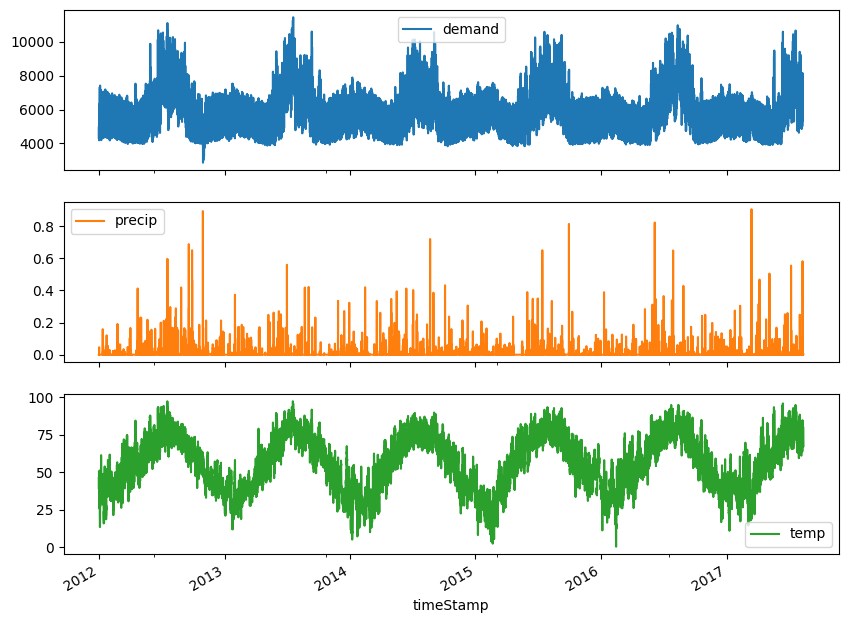

In [ ]:
ny_df.plot(subplots=True)

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

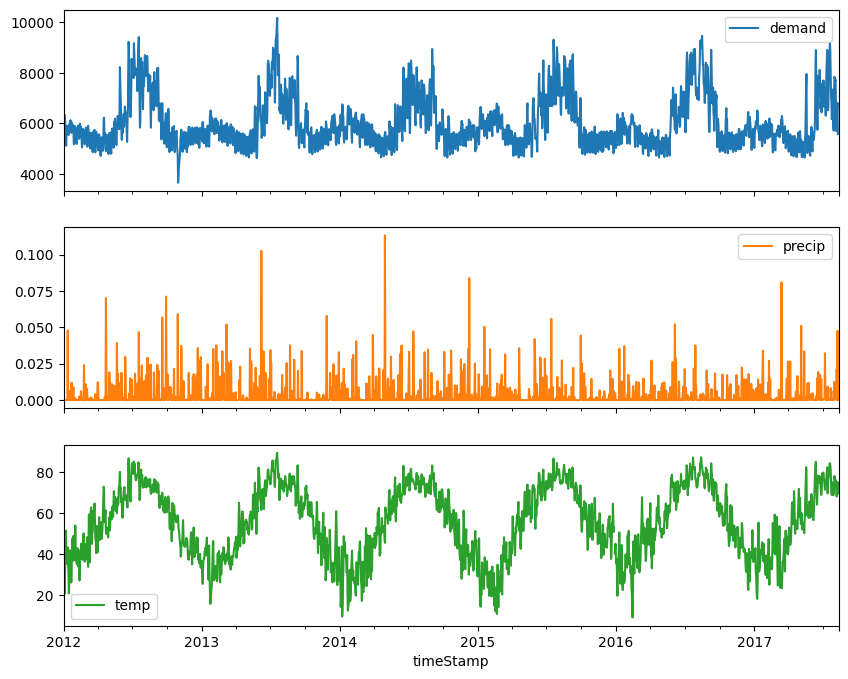

In [ ]:
ny_df_daily = ny_df.resample('D').mean()
ny_df_daily.plot(subplots=True)

the forecast we are going to predict

---

y(t) = g(t){trend component}+s(t){seasonality}+h(t){holiday}+e(t){residual/error component}

---

Here trend component is 0. So multiplicative modeling is not used.

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp': 'ds', 'demand':'y'}, axis='columns')

In [ ]:
ny_df_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [ ]:
train = ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test = ny_df_final[(ny_df_final['ds']> '2017-04-30')]

In [ ]:
train.shape

(1947, 2)

In [ ]:
test.shape

(104, 2)

In [ ]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)

In [ ]:
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/js4zebeg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/1lst3b3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51423', 'data', 'file=/tmp/tmpxtrda0n5/js4zebeg.json', 'init=/tmp/tmpxtrda0n5/1lst3b3t.json', 'output', 'file=/tmp/tmpxtrda0n5/prophet_modelat53xzup/prophet_model-20231025170006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m.params

OrderedDict([('lp__', array([[5009.88]])),
             ('k', array([[0.0885303]])),
             ('m', array([[0.593289]])),
             ('delta',
              array([[-8.51377e-08, -4.46024e-04, -1.00778e-01, -9.10087e-08,
                       2.08754e-08,  2.84313e-07,  1.81086e-08, -1.02157e-07,
                      -2.72908e-08, -3.77655e-08, -2.69110e-02, -7.17684e-02,
                      -2.08567e-07, -4.81343e-08,  2.30977e-01,  2.12849e-06,
                      -3.80712e-07, -8.58136e-02, -4.35610e-02,  2.02909e-08,
                       2.46565e-08,  2.03889e-08,  2.76521e-03,  1.22544e-02,
                       5.24778e-08]])),
             ('sigma_obs', array([[0.0459738]])),
             ('beta',
              array([[-0.0345704 , -0.0705133 ,  0.0576085 ,  0.0470652 , -0.014056  ,
                      -0.00500044, -0.00386426, -0.0007405 ,  0.00242043, -0.00755564,
                       0.00405483,  0.00483132, -0.00789636, -0.00470438,  0.00701818,
          

In [ ]:
future = m.make_future_dataframe(periods=104) # we are forecasting for the next 104 timeframe
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7590.895873,6669.849369,8518.033427
2047,2017-08-09,7580.018324,6714.410852,8450.720138
2048,2017-08-10,7534.743337,6659.057018,8440.799624
2049,2017-08-11,7489.968485,6549.837644,8382.114076
2050,2017-08-12,6915.155942,6024.752070,7870.150738


<Axes: xlabel='ds'>

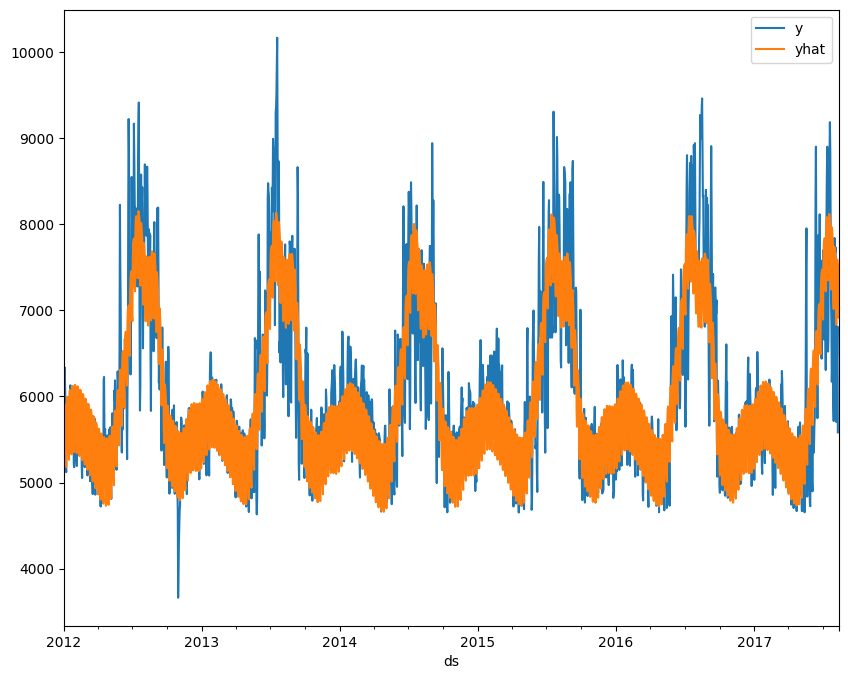

In [ ]:
pd.concat([ny_df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

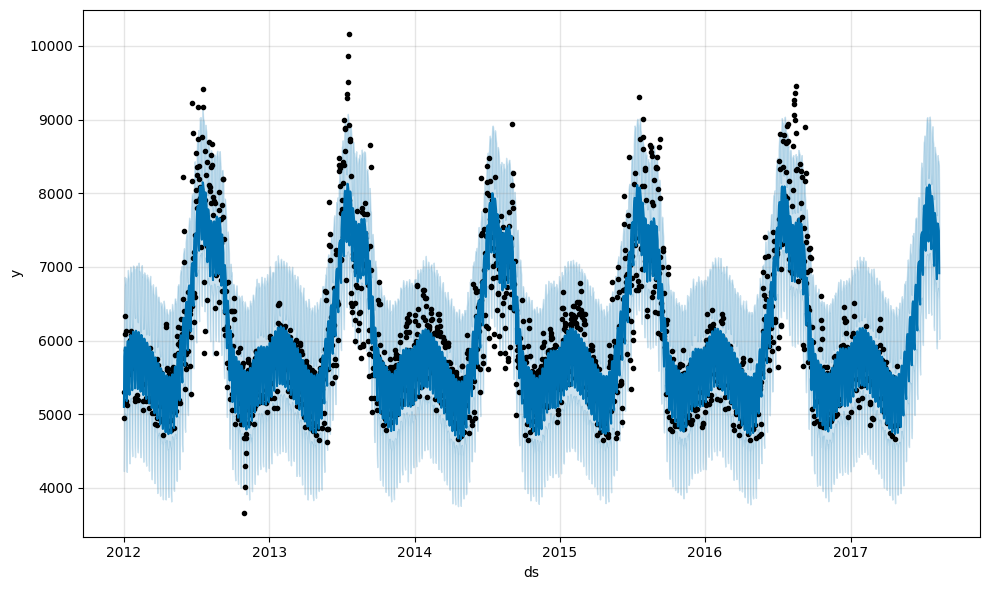

In [ ]:
fig1 = m.plot(forecast)

In the figure above the 95% confidence interval in light blue color, and the black dots are actual values. The deep blue are forecasted(yhat) values. We can see there are lot of outliers.

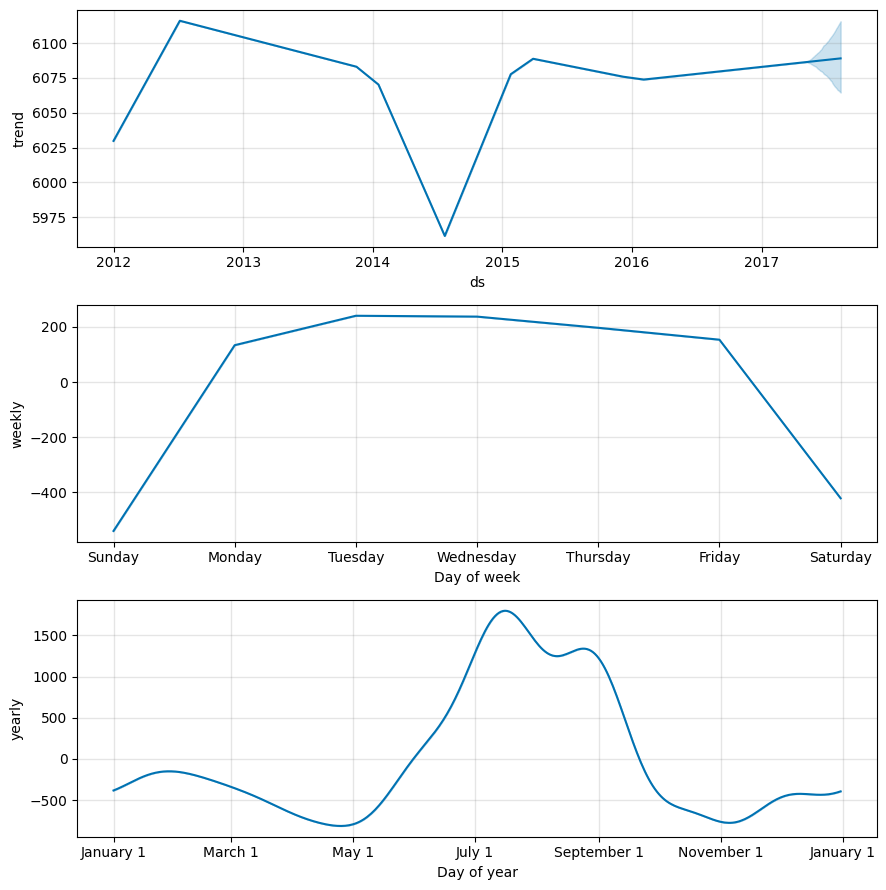

In [ ]:
fig2 = m.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/lb61kfuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/bw3rek6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50653', 'data', 'file=/tmp/tmpxtrda0n5/lb61kfuj.json', 'init=/tmp/tmpxtrda0n5/bw3rek6w.json', 'output', 'file=/tmp/tmpxtrda0n5/prophet_modelpeo9ol3s/prophet_model-20231025170010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


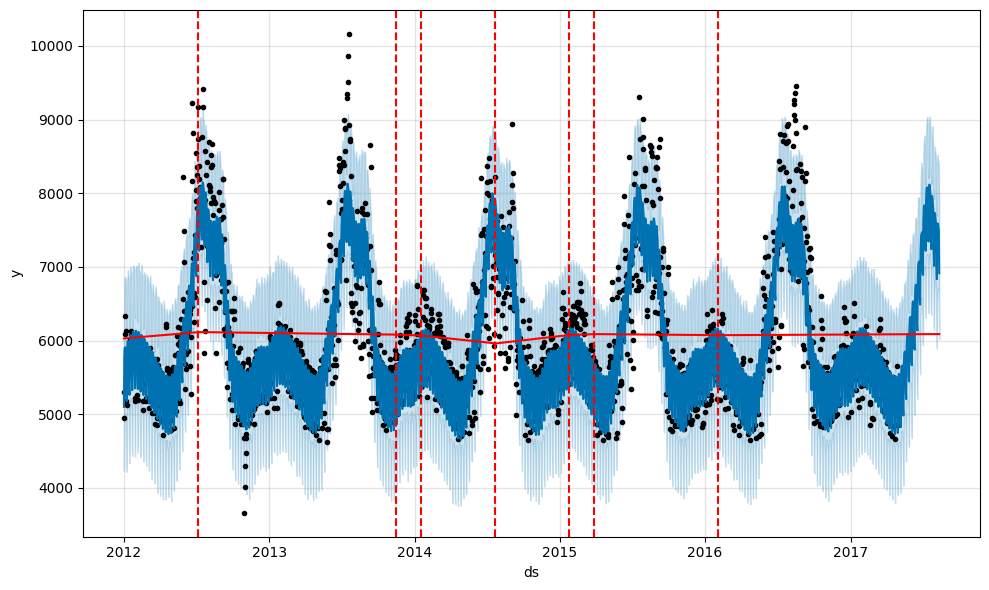

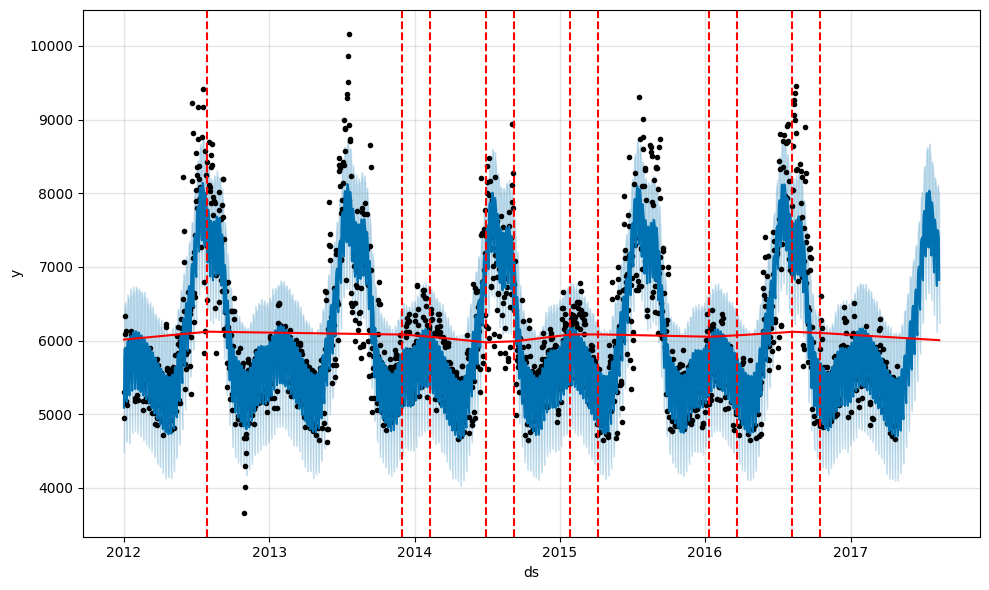

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)  # add_changepoints_to_plot function is used to highlight changepoints

pro_change = Prophet(changepoint_range= 0.9, yearly_seasonality = True)
forecast = pro_change.fit(train).predict(future)
fig = pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
deltas = m.params['delta'].mean(0) # calculating the average change in the trend component of the time series across the specified changepoints.
deltas

array([-8.51377e-08, -4.46024e-04, -1.00778e-01, -9.10087e-08,
        2.08754e-08,  2.84313e-07,  1.81086e-08, -1.02157e-07,
       -2.72908e-08, -3.77655e-08, -2.69110e-02, -7.17684e-02,
       -2.08567e-07, -4.81343e-08,  2.30977e-01,  2.12849e-06,
       -3.80712e-07, -8.58136e-02, -4.35610e-02,  2.02909e-08,
        2.46565e-08,  2.03889e-08,  2.76521e-03,  1.22544e-02,
        5.24778e-08])

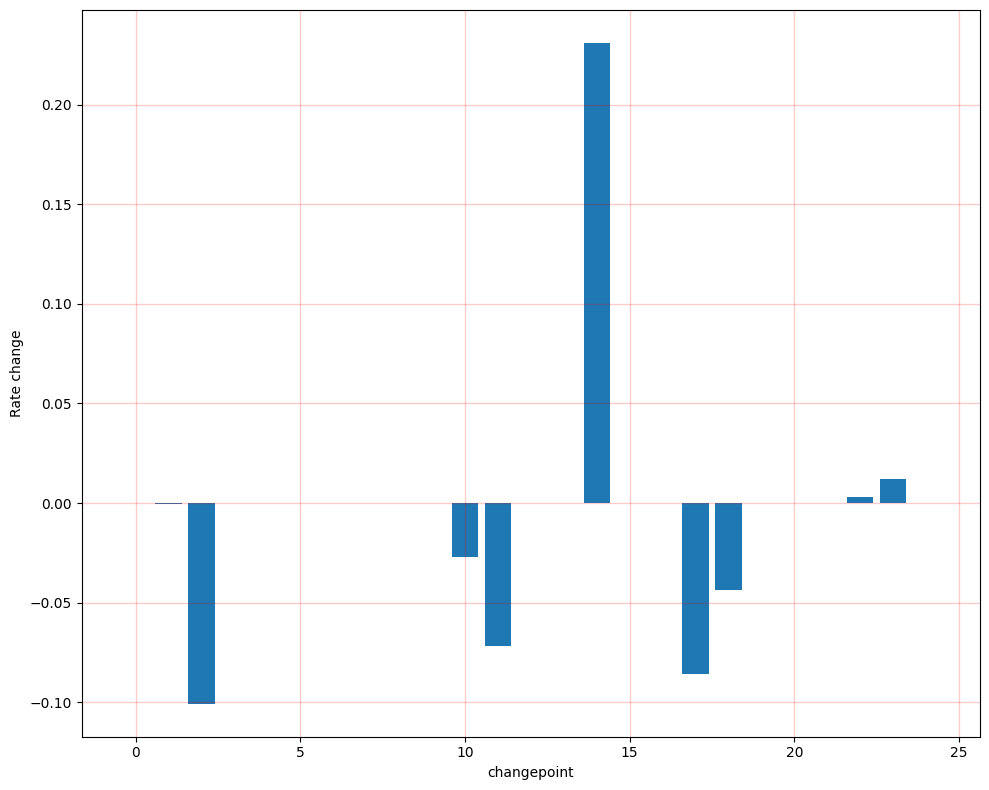

In [ ]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which = 'major', c = 'red', ls = '-', lw=1, alpha = 0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [ ]:
m.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/r10w6cib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/nkf8e1rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48560', 'data', 'file=/tmp/tmpxtrda0n5/r10w6cib.json', 'init=/tmp/tmpxtrda0n5/nkf8e1rx.json', 'output', 'file=/tmp/tmpxtrda0n5/prophet_modelojsm8b7a/prophet_model-20231025170013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


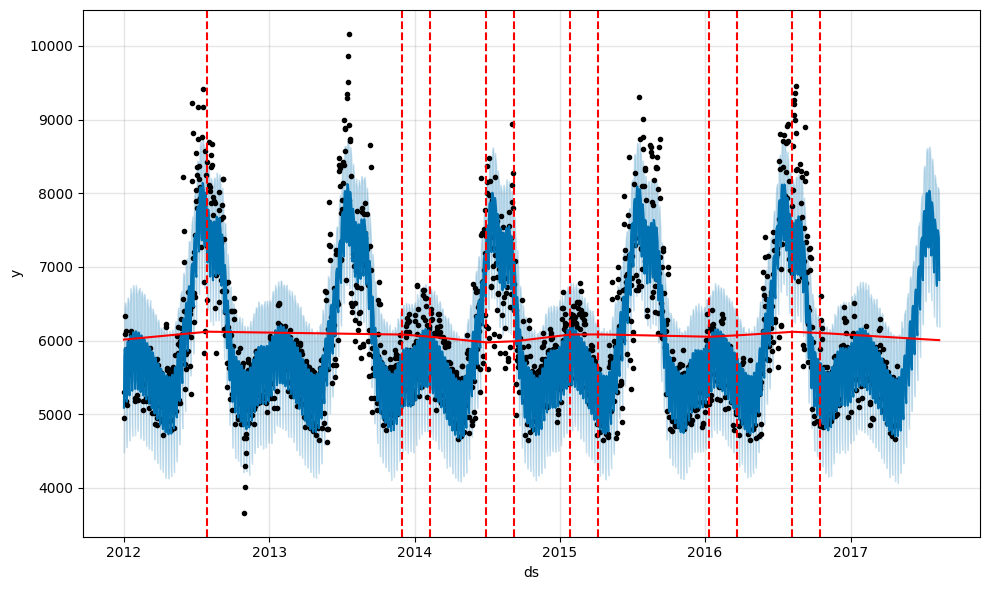

In [ ]:
pro_change = Prophet(changepoint_range= 0.9, yearly_seasonality = True)
forecast = pro_change.fit(train).predict(future)
fig = pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)
py.iplot(fig)

We can see that by using fbProphet, we can easily plot the graph automatically.

In [ ]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation(model = m, initial = '731 days', horizon = '365 days')

# The model is trained on the historical data up to the 731 days period data
# The model will make forecasts for a period of 365 days into the future for each fold of cross-validation
# It makes forecasts for the test period and evaluates the forecast accuracy using various metrics,
# such as mean absolute error (MAE) and mean squared error (MSE) for each cross validation.

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/di79n7vx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/2ub515vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49802', 'data', 'file=/tmp/tmpxtrda0n5/di79n7vx.json', 'init=/tmp/tmpxtrda0n5/2ub515vb.json', 'output', 'file=/tmp/tmpxtrda0n5/prophet_modeliv6ojaah/prophet_model-20231025170016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/40w4pcme.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtrda0n5/mpcgfrhi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5562.385568,4720.889858,6432.221872,5460.325000,2014-05-01
1,2014-05-03,4972.424834,4067.720645,5870.258222,4893.683333,2014-05-01
2,2014-05-04,4848.628078,3968.214406,5659.566560,4764.137500,2014-05-01
3,2014-05-05,5529.560178,4721.030988,6368.667426,5406.762500,2014-05-01
4,2014-05-06,5624.514712,4824.153593,6523.065538,5409.750000,2014-05-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,252053.608552,502.049408,406.744161,0.073115,0.065578,0.072144,0.890110
1,37 days 00:00:00,258748.469515,508.673244,414.105603,0.074395,0.066026,0.073340,0.884615
2,37 days 12:00:00,261071.043027,510.951116,417.504630,0.074981,0.067249,0.073955,0.884615
3,38 days 00:00:00,263836.859290,513.650523,420.595342,0.075243,0.068184,0.074191,0.884615
4,38 days 12:00:00,267546.528919,517.249001,425.838499,0.076081,0.068469,0.075056,0.884615
...,...,...,...,...,...,...,...,...
653,363 days 00:00:00,260441.866698,510.335053,447.558736,0.082610,0.082046,0.081706,0.983516
654,363 days 12:00:00,262153.389531,512.009169,448.641450,0.082802,0.082835,0.081994,0.983516
655,364 days 00:00:00,266545.846578,516.280783,452.233982,0.083649,0.084443,0.082846,0.978022
656,364 days 12:00:00,266605.804600,516.338847,451.944646,0.083633,0.084443,0.082915,0.978022


In [ ]:
print(df_p['mape'].max() , df_p['mape'].min())
print(df_p['mae'].max() , df_p['mae'].min())
print(df_p['mdape'].max() , df_p['mdape'].min())
print(df_p['smape'].max() , df_p['smape'].min())

0.10475179588813116 0.06142698067969529
704.8251925391082 328.5898752770228
0.10242961021125313 0.05292891328141122
0.10542369898962645 0.06094700168403503
